In [28]:
#football dissertation data to present 


In [1]:
import pandas as pd 
import numpy as ny
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data to use for dissertation final version1.csv")

In [3]:
# Define a function to clean and convert the 'Value' strings
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # Remove euro symbol
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
        else:
            try:
                return float(value)
            except ValueError:
                return None  # Return None if the value cannot be converted
    return value

# Apply the function to the 'Value' column
data['Value'] = data['Value'].apply(convert_value)

# Optionally, display the first few rows to confirm the transformation
print(data['Value'].head(20))

0       4100000.0
1       1800000.0
2      43500000.0
3       1000000.0
4      22000000.0
5       5000000.0
6      22500000.0
7      46000000.0
8     128500000.0
9       6000000.0
10     52500000.0
11     14500000.0
12     39500000.0
13      2100000.0
14      3300000.0
15     43500000.0
16     11500000.0
17     45000000.0
18      6500000.0
19     31000000.0
Name: Value, dtype: float64


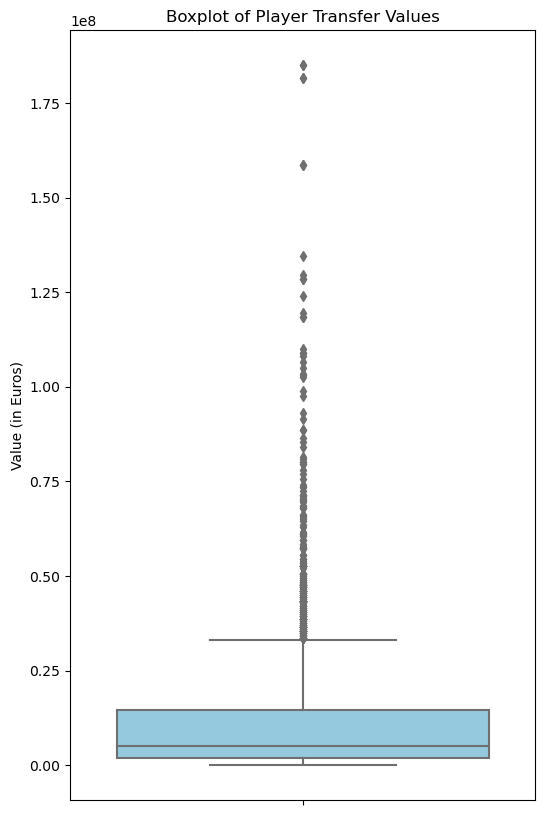

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define a function to clean and convert the 'Value' strings if not already done
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # Remove euro symbol
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
    return value

# Apply the function to clean the 'Value' column
data['Value'] = data['Value'].apply(convert_value)

# Plotting a vertical boxplot for 'Value'
plt.figure(figsize=(6, 10))
sns.boxplot(y=data['Value'], color='skyblue')
plt.title('Boxplot of Player Transfer Values')
plt.ylabel('Value (in Euros)')
plt.show()


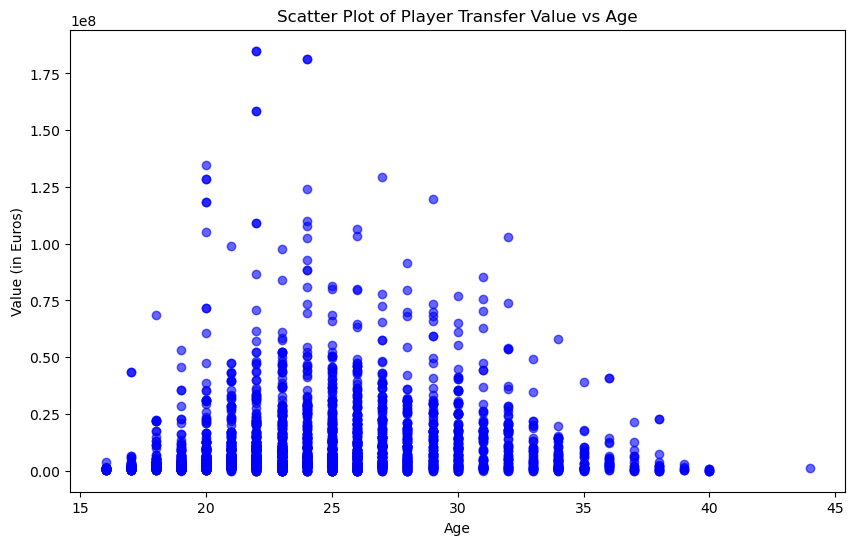

In [5]:
# Ensure 'Value' is in numeric format if it's not already cleaned
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # Remove euro symbol
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
    return value

# Apply the function to clean the 'Value' column
data['Value'] = data['Value'].apply(convert_value)

# Create the scatter plot for Value vs Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Value'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Player Transfer Value vs Age')
plt.xlabel('Age')
plt.ylabel('Value (in Euros)')
plt.show()

C:\Users\ianth\AppData\Local\Temp\ipykernel_5988\792559319.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Value', y='Best position', data=data, estimator=np.mean, ci=None,


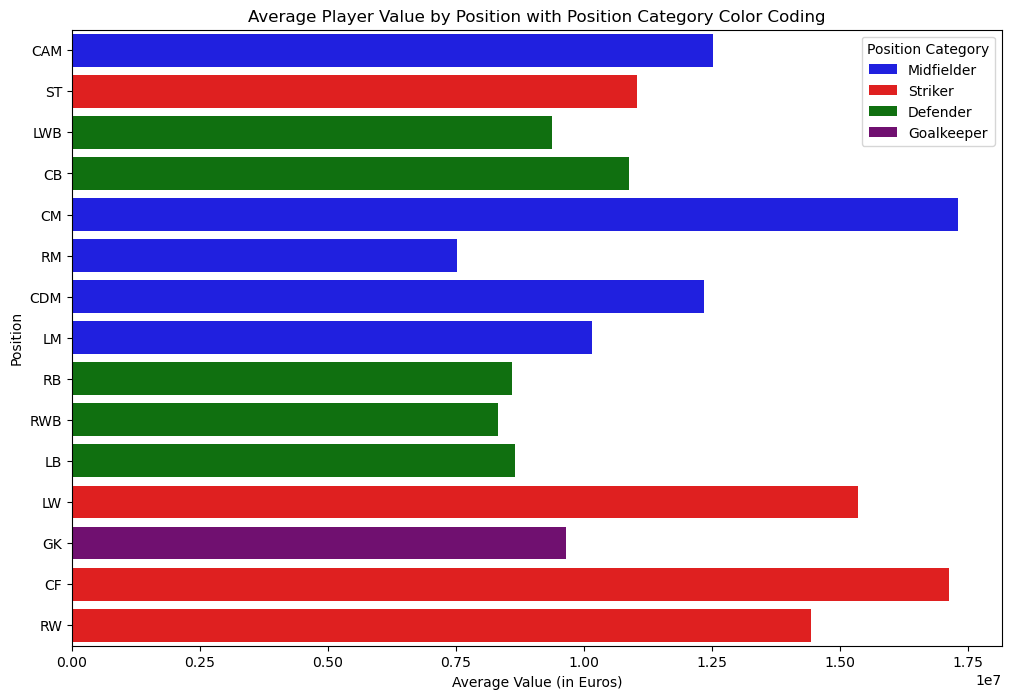

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Define a function to clean and convert the 'Value' strings if not already done
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # Remove euro symbol
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
        elif 'K' in value:
            return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
    return value

# Apply the function to clean the 'Value' column
data['Value'] = data['Value'].apply(convert_value)

# Categorize positions into general categories (Striker, Midfielder, Defender, Goalkeeper)
position_mapping = {
    'ST': 'Striker', 'CF': 'Striker', 'LW': 'Striker', 'RW': 'Striker',
    'CM': 'Midfielder', 'CAM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}

# Map 'Best position' to general categories
data['Position Category'] = data['Best position'].map(position_mapping)

# Set up color palette
palette = {'Striker': 'red', 'Midfielder': 'blue', 'Defender': 'green', 'Goalkeeper': 'purple'}

# Plotting the average player value by position with color coding
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Best position', data=data, estimator=np.mean, ci=None,
            hue='Position Category', dodge=False, palette=palette)
plt.title('Average Player Value by Position with Position Category Color Coding')
plt.xlabel('Average Value (in Euros)')
plt.ylabel('Position')
plt.legend(title='Position Category')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Count players per club
club_counts = data['Team & Contract'].value_counts().head(10)  # Adjust number as needed


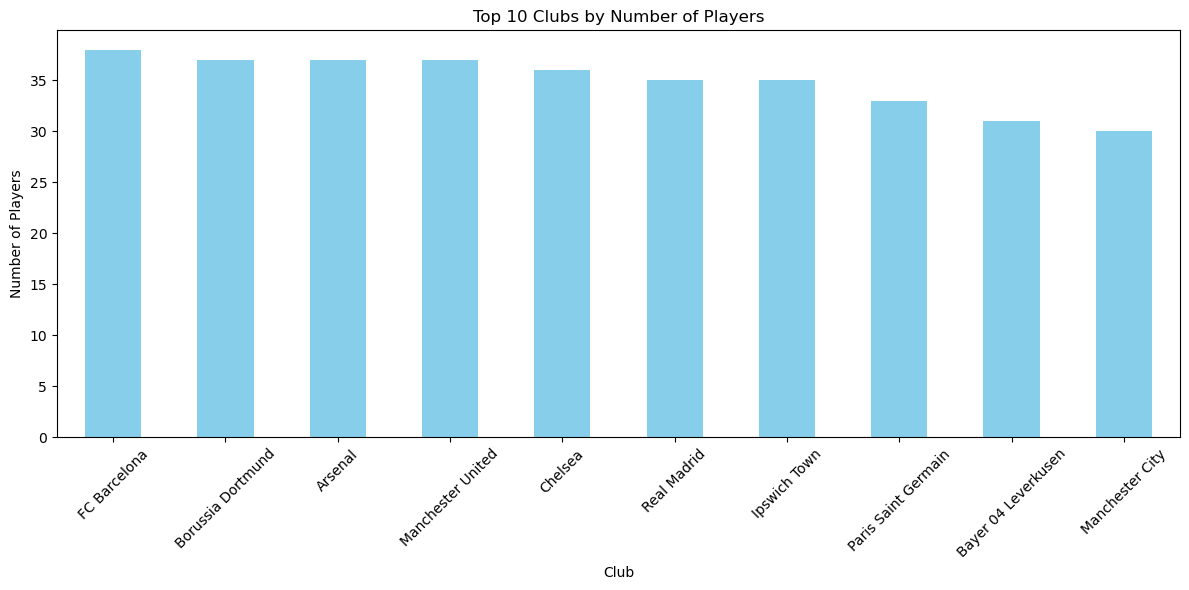

In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame containing the 'Team & Contract' column
data1 = data['Team & Contract']

# Function to extract only the club names
def extract_club_names(data1):
    club_names = []
    for entry in data1:
        # Use regex to extract the part before the newline or date/loan information
        club_name = re.split(r"\n|\d{4}|~|On loan|Free", entry)[0].strip()
        club_names.append(club_name)
    return club_names

# Extracted club names
club_names = extract_club_names(data1)

# Count the number of players per club
club_counts = pd.Series(club_names).value_counts()

# Select the top 10 clubs and bottom 10 
top_10_clubs = club_counts.nlargest(10)
bottom_10_clubs = club_counts.nsmallest(10)

# Plotting the top 10 clubs by player count
plt.figure(figsize=(12, 6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clubs by Number of Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



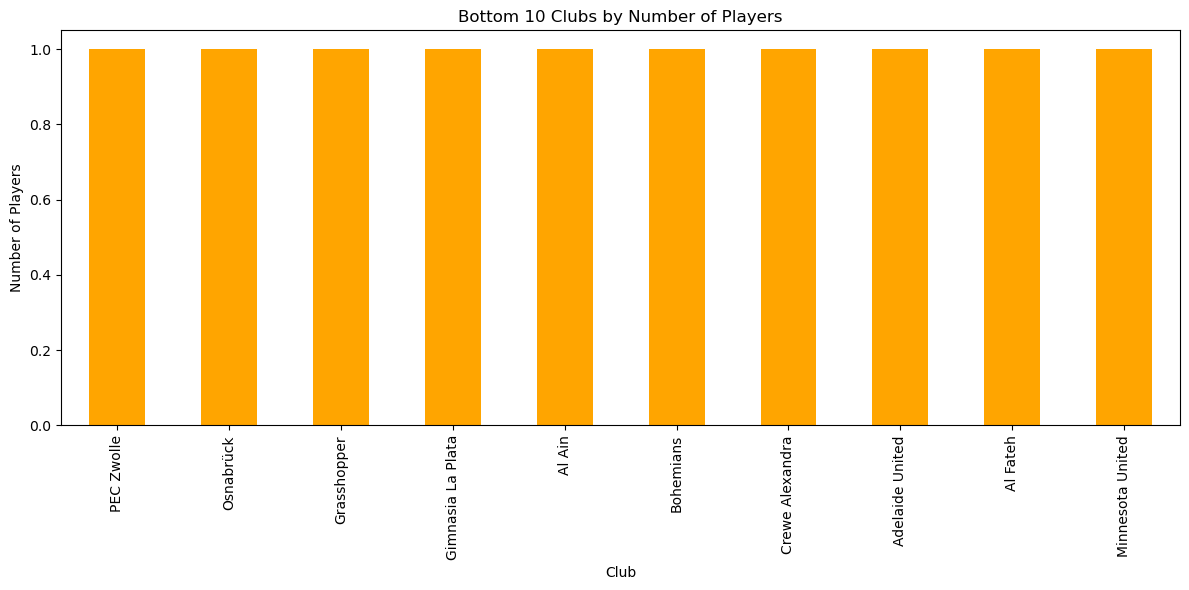

In [9]:
plt.figure(figsize=(12, 6))

# Plot the bar chart
bottom_10_clubs.plot(kind='bar', color='orange')

# Set the title and labels
plt.title('Bottom 10 Clubs by Number of Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')



# Ensure the layout fits
plt.tight_layout()
plt.show()

C:\Users\ianth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


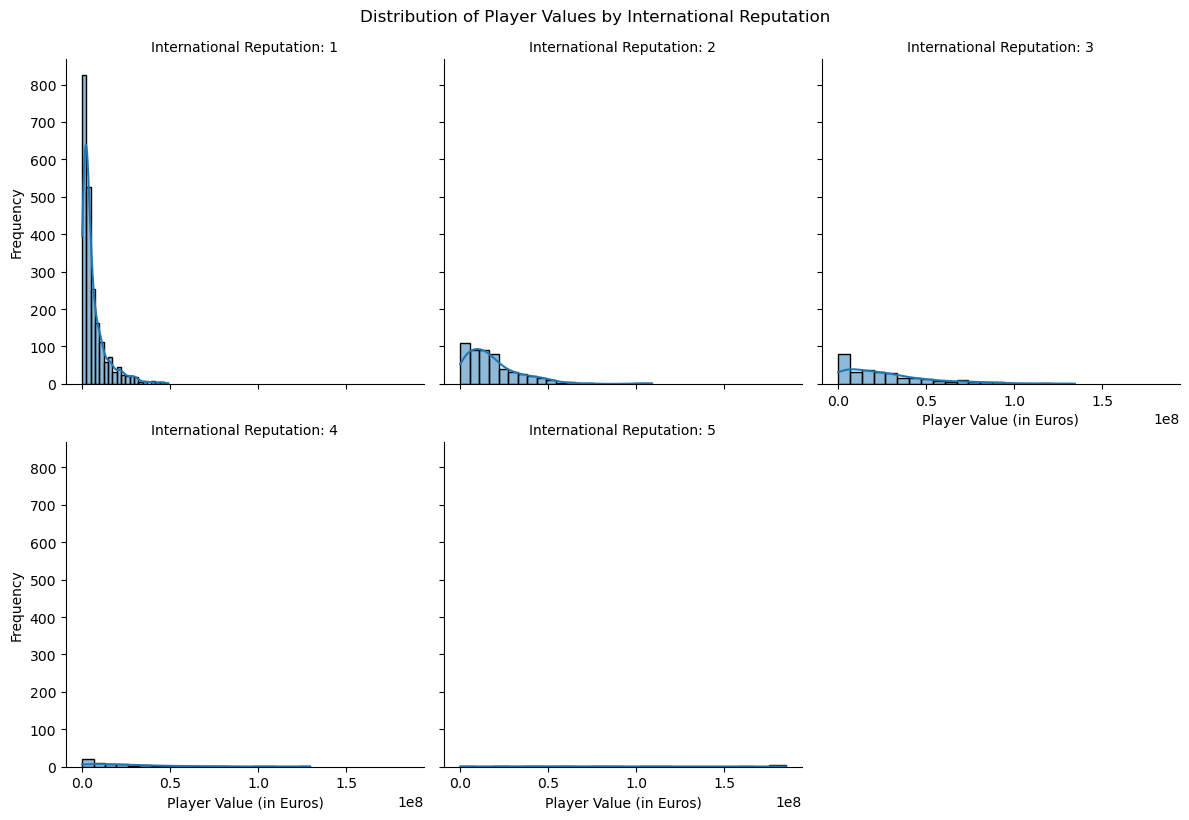

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the FacetGrid with one plot per reputation level
g = sns.FacetGrid(data, col="International reputation", col_wrap=3, height=4)
g.map(sns.histplot, "Value", kde=True, bins=20)
g.set_axis_labels("Player Value (in Euros)", "Frequency")
g.set_titles("International Reputation: {col_name}")
g.fig.suptitle('Distribution of Player Values by International Reputation', y=1.02)
plt.show()